# Data transformation 

In [3]:
# importing library
import numpy as np
import pandas as pd

In [7]:
# reading files
event_type= pd.read_csv("./telstra/event_type.csv")
log_feature= pd.read_csv("./telstra/log_feature.csv")
resource_type= pd.read_csv("./telstra/resource_type.csv")
severity_type= pd.read_csv("./telstra/severity_type.csv")
train= pd.read_csv("./telstra/train.csv")

## checking the data type of each datasets

In [10]:
event_type.dtypes

id             int64
event_type    object
dtype: object

In [11]:
log_feature.dtypes


id              int64
log_feature    object
volume          int64
dtype: object

In [12]:
resource_type.dtypes


id                int64
resource_type    object
dtype: object

In [13]:
severity_type.dtypes


id                int64
severity_type    object
dtype: object

In [14]:
train.dtypes

id                 int64
location          object
fault_severity     int64
dtype: object

## Viewing each datasets

In [15]:
event_type

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11
...,...,...
31165,3761,event_type 11
31166,8720,event_type 11
31167,6488,event_type 11
31168,878,event_type 11


In [16]:
log_feature

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1
...,...,...,...
58666,8720,feature 209,1
58667,6488,feature 54,3
58668,878,feature 62,1
58669,4464,feature 209,1


In [17]:
resource_type

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8
...,...,...
21071,3761,resource_type 8
21072,8720,resource_type 8
21073,6488,resource_type 8
21074,878,resource_type 8


In [18]:
severity_type

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1
...,...,...
18547,3761,severity_type 1
18548,8720,severity_type 1
18549,6488,severity_type 2
18550,878,severity_type 2


In [19]:
train

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0
...,...,...,...
7376,870,location 167,0
7377,18068,location 106,0
7378,14111,location 1086,2
7379,15189,location 7,0


## Convert to numeric datatype

In [20]:
event_type['id']=pd.to_numeric(event_type['id'],errors='coerce')

In [21]:
train['id']=pd.to_numeric(train['id'],errors='coerce')


In [23]:
log_feature['id']=pd.to_numeric(log_feature['id'],errors='coerce')

In [24]:
resource_type['id']=pd.to_numeric(resource_type['id'],errors='coerce')

In [25]:
severity_type['id']=pd.to_numeric(severity_type['id'],errors='coerce')

### Merging each datasets 

In [27]:
#merging the data sets 
train_1 = train.merge(severity_type, how = 'left', left_on='id', right_on='id')
train_2 = train_1.merge(resource_type, how = 'left', left_on='id', right_on='id')
train_3 = train_2.merge(log_feature, how = 'left', left_on='id', right_on='id')
train_4 = train_3.merge(event_type, how = 'left', left_on='id', right_on='id')
train_4

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 35
2,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 34
3,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 35
4,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34
...,...,...,...,...,...,...,...,...
61834,15189,location 7,0,severity_type 1,resource_type 8,feature 55,10,event_type 11
61835,15189,location 7,0,severity_type 1,resource_type 8,feature 70,1,event_type 11
61836,17067,location 885,0,severity_type 1,resource_type 8,feature 81,1,event_type 11
61837,17067,location 885,0,severity_type 1,resource_type 8,feature 191,1,event_type 11


In [31]:
# getting the dimension of merged dataset
train_1.shape
train_2.shape
train_3.shape
train_4.shape

(61839, 8)

In [30]:
train_4.isnull().sum() # to find out about missing value

id                0
location          0
fault_severity    0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dtype: int64

### Drop dublicate

In [36]:
#Drop duplicate
d_duplicates = train_4.drop_duplicates(subset = 'id', keep = 'first')

In [37]:
#Reset index
d_duplicates.reset_index(inplace = True, drop = True)

### Subsetting 

In [38]:
#subsetting first 10 rows and all columns
d_duplicates.iloc[:10]

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34
2,14394,location 152,1,severity_type 2,resource_type 2,feature 221,1,event_type 35
3,8218,location 931,1,severity_type 1,resource_type 8,feature 80,9,event_type 15
4,14804,location 120,0,severity_type 1,resource_type 2,feature 134,1,event_type 34
5,1080,location 664,0,severity_type 1,resource_type 8,feature 171,8,event_type 11
6,9731,location 640,0,severity_type 4,resource_type 2,feature 374,3,event_type 50
7,15505,location 122,0,severity_type 2,resource_type 2,feature 235,1,event_type 34
8,3443,location 263,1,severity_type 2,resource_type 2,feature 312,1,event_type 34
9,13300,location 613,1,severity_type 1,resource_type 8,feature 71,1,event_type 54


In [39]:
#Subsetting first seven(7) rows and certain columns
d_duplicates.iloc[:7,[1,3,7,6,5]]

,location,severity_type,event_type,volume,log_feature
0,location 118,severity_type 2,event_type 34,19,feature 312
1,location 91,severity_type 2,event_type 34,200,feature 315
2,location 152,severity_type 2,event_type 35,1,feature 221
3,location 931,severity_type 1,event_type 15,9,feature 80
4,location 120,severity_type 1,event_type 34,1,feature 134
5,location 664,severity_type 1,event_type 11,8,feature 171
6,location 640,severity_type 4,event_type 50,3,feature 374


In [40]:
#Subsetting event_type 11 from the merged dataset
event_type = d_duplicates[d_duplicates['event_type']=='event_type 11']
event_type

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
5,1080,location 664,0,severity_type 1,resource_type 8,feature 171,8,event_type 11
10,8976,location 760,1,severity_type 1,resource_type 8,feature 136,1,event_type 11
12,10342,location 746,0,severity_type 1,resource_type 2,feature 134,3,event_type 11
13,6741,location 1066,1,severity_type 1,resource_type 8,feature 68,5,event_type 11
14,7187,location 812,0,severity_type 1,resource_type 8,feature 167,5,event_type 11
...,...,...,...,...,...,...,...,...
7367,8336,location 902,0,severity_type 1,resource_type 2,feature 134,1,event_type 11
7373,16687,location 1090,1,severity_type 1,resource_type 8,feature 202,4,event_type 11
7374,6813,location 1115,1,severity_type 1,resource_type 8,feature 73,2,event_type 11
7379,15189,location 7,0,severity_type 1,resource_type 8,feature 191,3,event_type 11


### Export merge datasets as csv file

In [42]:
d_duplicates.to_csv('./telstra./Telstra output.csv', index = True, encoding = 'utf-8')

### Visualization

In [43]:
#Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


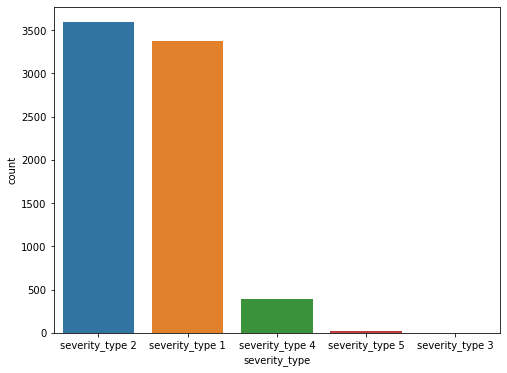

In [45]:
plt.figure(figsize = (8,6))
sns.countplot(d_duplicates['severity_type'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


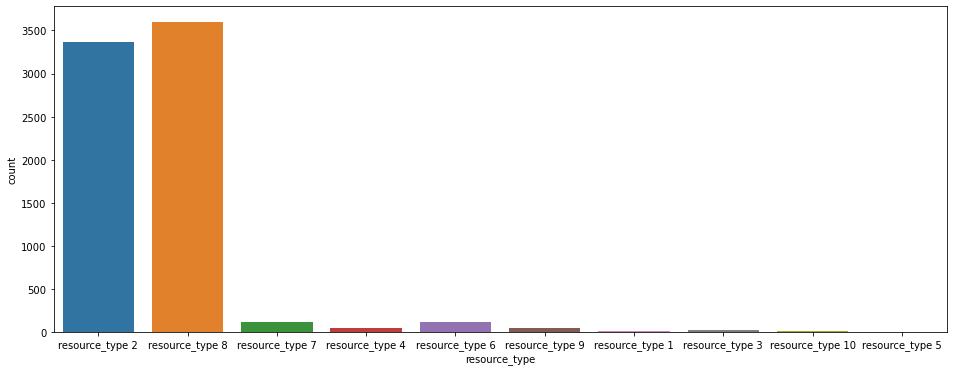

In [50]:
plt.figure(figsize = (16,6))
sns.countplot(d_duplicates['resource_type'])
plt.show()